# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2021-1**<br>
**Profesora:** Paula Aguirre <br>

## Clase 8: Webscraping

---

# 1. Librerías para webscraping

El proceso de webscrapping en su expresión mas básica consiste en la extracción de datos desde el texto plano que estructura la página web (HTML). Requests nos brinda herramientas para la extracción de la página, y a continuación podemos usar otras librerías como BeautifulSoup para la extracción de elementos o información contenida en el texto plano.

### Para instalar `BeautifulSoup`:

`pip install BeautifulSoup4`

o

`conda install beautifulsoup4`


In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd

# 2.Código HTML

Veamos primero un ejemplo simple de código HTML para comprender su estructura general.

In [2]:
html_text=open('ejemplo.html','r').read()
html_text

"<html>\n    <head>\n        <title>Clase 8: Web Scrapping</title>\n    </head>\n    <body>\n        <h1>1. Código HTML</h1>\n        <p> Este es un ejemplo para comprender la estructura de un documento HTML. Los pasos a seguir son:\n          <ul id='list' class='pasos'>\n            <li> Leer el código HTML</li>\n            <li> Formatear (parse) usando BeautifulSoup, y </li>\n            <li> Extraer la información de interés. </li>\n          </ul>\n        </p>\n\n        <p>También podemos crear una tabla:\n\n          <table>\n           <tr>\n             <th>Curso</th>\n             <th>Créditos</th>\n             <th>N Estudiantes</th>\n           </tr>\n           <tr>\n             <td>IMT2200</td>\n             <td>10</td>\n             <td>42</td>\n           </tr>\n           <tr>\n             <td>OFG1100</td>\n             <td>5</td>\n             <td>25</td>\n           </tr>\n         </table>\n         </p>\n    </body>\n</html>\n"

In [3]:
soup = BeautifulSoup(html_text,"html.parser")
soup

<html>
<head>
<title>Clase 8: Web Scrapping</title>
</head>
<body>
<h1>1. Código HTML</h1>
<p> Este es un ejemplo para comprender la estructura de un documento HTML. Los pasos a seguir son:
          <ul class="pasos" id="list">
<li> Leer el código HTML</li>
<li> Formatear (parse) usando BeautifulSoup, y </li>
<li> Extraer la información de interés. </li>
</ul>
</p>
<p>También podemos crear una tabla:

          <table>
<tr>
<th>Curso</th>
<th>Créditos</th>
<th>N Estudiantes</th>
</tr>
<tr>
<td>IMT2200</td>
<td>10</td>
<td>42</td>
</tr>
<tr>
<td>OFG1100</td>
<td>5</td>
<td>25</td>
</tr>
</table>
</p>
</body>
</html>

In [4]:
soup.head
soup.body
soup.p

<p> Este es un ejemplo para comprender la estructura de un documento HTML. Los pasos a seguir son:
          <ul class="pasos" id="list">
<li> Leer el código HTML</li>
<li> Formatear (parse) usando BeautifulSoup, y </li>
<li> Extraer la información de interés. </li>
</ul>
</p>

In [5]:
table=soup.find('table')
print(table)

<table>
<tr>
<th>Curso</th>
<th>Créditos</th>
<th>N Estudiantes</th>
</tr>
<tr>
<td>IMT2200</td>
<td>10</td>
<td>42</td>
</tr>
<tr>
<td>OFG1100</td>
<td>5</td>
<td>25</td>
</tr>
</table>


In [6]:
import pandas as pd
df=pd.DataFrame(columns=['Curso','Creditos','nEstudiantes'])
table=soup.find('table')
rows=table.find_all('tr')
#print(rows)
for row in rows[1::]:
    cols = row.find_all("td")
    #print(cols)
    col_text=[c.text for c in cols]
    print(col_text)
    df=df.append({'Curso':col_text[0],'Creditos':col_text[1],'nEstudiantes':col_text[2]},ignore_index=True)
df

['IMT2200', '10', '42']
['OFG1100', '5', '25']


,Curso,Creditos,nEstudiantes
0,IMT2200,10,42
1,OFG1100,5,25


# 2. Ejemplo: Extracción de datos de Wikipedia

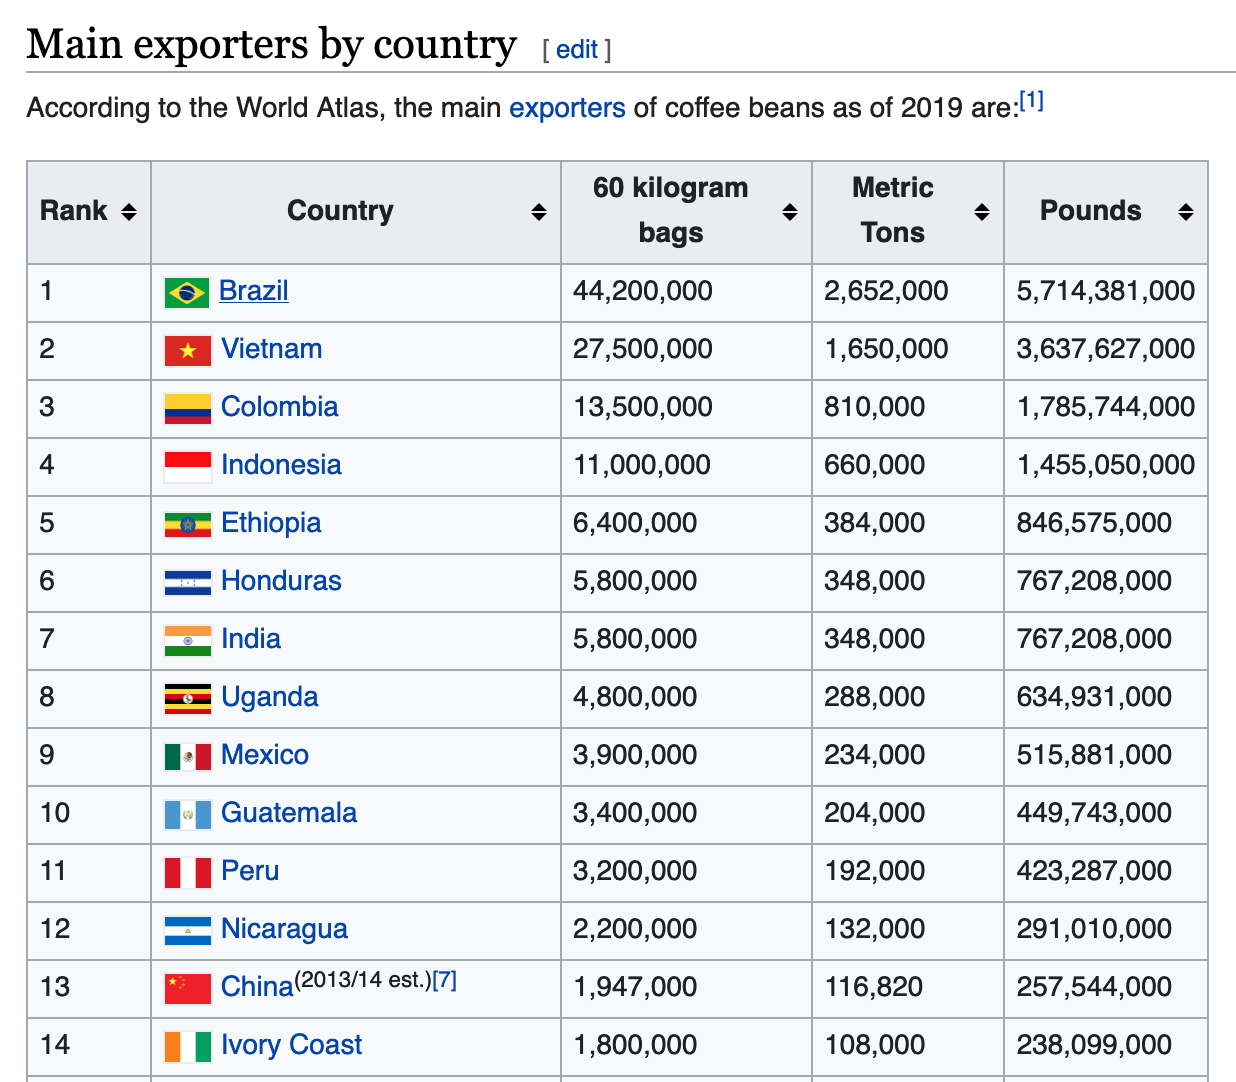

In [7]:
#Import needed libraries
from bs4 import BeautifulSoup as bs
import requests as rq
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
url="https://en.wikipedia.org/wiki/List_of_countries_by_coffee_production"
page=rq.get(url).text
page

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of countries by coffee production - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"b2770028-a026-4442-87b7-50be923ad26a","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_coffee_production","wgTitle":"List of countries by coffee production","wgCurRevisionId":1039897246,"wgRevisionId":1039897246,"wgArticleId":36196672,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Coff

In [9]:
soup=bs(page)
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of countries by coffee production - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"b2770028-a026-4442-87b7-50be923ad26a","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_coffee_production","wgTitle":"List of countries by coffee production","wgCurRevisionId":1039897246,"wgRevisionId":1039897246,"wgArticleId":36196672,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Coffee pro

Al inspeccionar la página, podemos ver que los nombres de países y cantidades están enmarcadas por la etiqueta `<table>`. Dado que es la primera tabla de la página, fondemos usar la función `find`para extraerla. Esto nos entrega todo el contenido de la tabla ,incluyendo el encabezado (primera fila) y las cantidades en distintas unidades.



In [10]:
tables=soup.find_all('table')
len(tables)

4

In [11]:
table=soup.find('table')
table

<table border="1" class="wikitable sortable">
<tbody><tr>
<th>Rank
</th>
<th>Country
</th>
<th>60 kilogram bags
</th>
<th>Metric Tons
</th>
<th>Pounds
</th></tr>
<tr>
<td>1
</td>
<td><span class="flagicon"><a href="/wiki/Brazil" title="Brazil"><img alt="Brazil" class="thumbborder" data-file-height="504" data-file-width="720" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/en/thumb/0/05/Flag_of_Brazil.svg/22px-Flag_of_Brazil.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/0/05/Flag_of_Brazil.svg/33px-Flag_of_Brazil.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/0/05/Flag_of_Brazil.svg/43px-Flag_of_Brazil.svg.png 2x" width="22"/></a></span> <a href="/wiki/Coffee_production_in_Brazil" title="Coffee production in Brazil">Brazil</a>
</td>
<td>44,200,000
</td>
<td>2,652,000
</td>
<td>5,714,381,000
</td></tr>
<tr>
<td>2
</td>
<td><span class="flagicon"><a href="/wiki/Vietnam" title="Vietnam"><img alt="Vietnam" class="thumbborder" data-file-height="600" d

In [12]:
#creamos un DataFrame vacío
df=pd.DataFrame(columns = ['country','bags_60kg','tons_metric','pounds'])

#iterar sobre cada fila ('tr')
for row in table.find_all('tr')[1::]:
    cols = row.find_all("td")
    #print(cols)
    cols = [col.text.strip() for col in cols]
    #print(cols)
    country=cols[1]
    bags=cols[2]
    tons=cols[3]
    pounds=cols[4]
    df=df.append({'country': country, 'bags_60kg': bags, 'tons_metric': tons,'pounds':pounds}, ignore_index=True)
        
df      

,country,bags_60kg,tons_metric,pounds
0,Brazil,"44,200,000","2,652,000","5,714,381,000"
1,Vietnam,"27,500,000","1,650,000","3,637,627,000"
2,Colombia,"13,500,000","810,000","1,785,744,000"
3,Indonesia,"11,000,000","660,000","1,455,050,000"
4,Ethiopia,"6,400,000","384,000","846,575,000"
5,Honduras,"5,800,000","348,000","767,208,000"
6,India,"5,800,000","348,000","767,208,000"
7,Uganda,"4,800,000","288,000","634,931,000"
8,Mexico,"3,900,000","234,000","515,881,000"
9,Guatemala,"3,400,000","204,000","449,743,000"


In [24]:
df['pounds'].sum()

'5,714,381,0003,637,627,0001,785,744,0001,455,050,000846,575,000767,208,000767,208,000634,931,000515,881,000449,743,000423,287,000291,010,000257,544,000238,099,000197,357,000110,187,000105,821,000105,821,000100,795,00092,594,00075,398,00068,784,00068,784,00066,138,00066,138,00066,138,00052,910,00046,297,00044,312,00033,069,00026,455,00026,455,00026,455,00021,164,00015,873,00013,227,00013,227,00011,904,00010,582,0008,598,0005,291,0004,894,0004,761,0004,629,0002,777,0002,645,0002,116,0001,587,0001,322,000793,000264,000'

## Ejemplo 3: Información de productos en una tienda

En este ejempl usaremos una página de venta de libros ficticia, para extraer la información de todos los productos en la página: http://books.toscrape.com/

El objetivo es generar un DataFrame con las siguientes columnas para cada libro:
* book title
* price
* availability
* category
* rating
    
Al inspeccionar el código HTML de la página web, podemos identificar la siguiente sección con la información de productos:

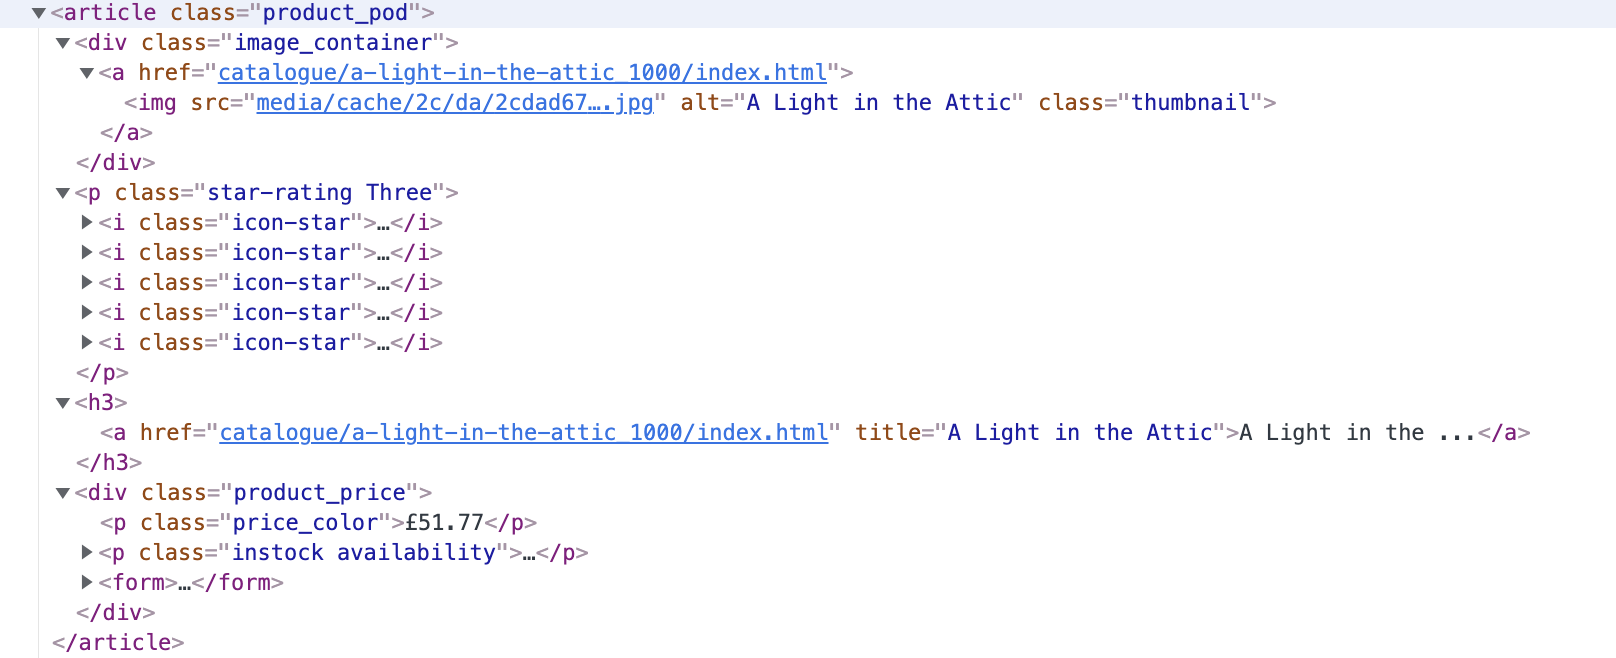

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup 
main_url = "http://books.toscrape.com/index.html"

result = requests.get(main_url)
soup = BeautifulSoup(result.text, 'html.parser')
soup

<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="s

In [2]:
#resumimos los pasos anteriores en una función
def getAndParseURL(url):
    result = requests.get(url)
    soup = BeautifulSoup(result.text, 'html.parser')
    return(soup)

In [13]:
#inspeccionamos la sopa para llegar a lo que nos interesa: la info de cada producto
lista=soup.find_all("article", class_ = "product_pod")
lista[0].div.a



<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>

In [7]:
#para cada artículo, hay una url que lleva a la página con la información detallada del producto
url=soup.find("article", class_ = "product_pod").div.a.get('href')
url

'catalogue/a-light-in-the-attic_1000/index.html'

In [8]:
#para que sea una url completa, falta agregar la primera parte: "http://books.toscrape.com/
url=main_url.split('/index.html')[0]+'/'+url
url

'http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html'

In [15]:
#resumimos los pasos para llegar a la url de cada producto en una función
def getBooksURLs(url):
    soup = getAndParseURL(url)
    return(['/'.join(url.split('/')[:-1])+'/'+ x.div.a.get('href') for x in soup.findAll("article", class_ = "product_pod")])


In [17]:
#urls para todos los artículos de la página principal
main_page_products_urls = getBooksURLs(main_url)
len(main_page_products_urls)

20

In [18]:
#para obtener las urls a todos los productos de la tienda, tenemos que recorrer varias páginas
pages_urls = []

for i in range(1,51,1):
    new_page="http://books.toscrape.com/catalogue/page-%d.html"%i

    if requests.get(new_page).status_code == 200:
        pages_urls.append(new_page)    

print("Ejemplos:")
pages_urls[:5]

Ejemplos:


['http://books.toscrape.com/catalogue/page-1.html',
 'http://books.toscrape.com/catalogue/page-2.html',
 'http://books.toscrape.com/catalogue/page-3.html',
 'http://books.toscrape.com/catalogue/page-4.html',
 'http://books.toscrape.com/catalogue/page-5.html']

In [20]:
#ahora recorremos todas las páginas, para recolectar las url de todos los productos de la tienda
booksURLs = []
for page in pages_urls:
    booksURLs.extend(getBooksURLs(page))
    
print(str(len(booksURLs)) + " productos con URLs")
print("Ejemplos:")
booksURLs[::5]

1000 productos con URLs
Ejemplos:


['http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html',
 'http://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html',
 'http://books.toscrape.com/catalogue/soumission_998/index.html',
 'http://books.toscrape.com/catalogue/sharp-objects_997/index.html',
 'http://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html',
 'http://books.toscrape.com/catalogue/the-requiem-red_995/index.html',
 'http://books.toscrape.com/catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html',
 'http://books.toscrape.com/catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html',
 'http://books.toscrape.com/catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html',
 'http://books.toscrape.com/catalogue/the-black-maria_991/index.html',
 'http://books.toscrape.com/catalogue/starving-hearts-triangular-trade-trilogy-1_990

In [24]:
names = []
prices = []
nb_in_stock = []
categories = []

# scrape data for every book URL: this may take some time
for url in booksURLs[1:5]:
    soup = getAndParseURL(url)
    # product name
    names.append(soup.find("div", class_ = "col-sm-6 product_main").h1.text)
    # product price
    prices.append(soup.find("p", class_ = "price_color").text[2:]) # get rid of the pound sign
    # number of available products
    nb_in_stock.append(soup.find("p", class_ = "instock availability").text) # get rid of non numerical characters
    
    # product category
    lines=soup.find("ul",class_='breadcrumb').find_all('li')
    category=lines[-2].a.text
    categories.append(category)
   
print(names,prices,)

scraped_data = pd.DataFrame({'name': names, 'price': prices, 'nb_in_stock': nb_in_stock, "product_category": categories})
scraped_data.head()

['Tipping the Velvet', 'Soumission', 'Sharp Objects', 'Sapiens: A Brief History of Humankind'] ['53.74', '50.10', '47.82', '54.23']


,name,price,nb_in_stock,product_category
0,Tipping the Velvet,53.74,\n\n \n In stock (20 available)\n \n,Historical Fiction
1,Soumission,50.10,\n\n \n In stock (20 available)\n \n,Fiction
2,Sharp Objects,47.82,\n\n \n In stock (20 available)\n \n,Mystery
3,Sapiens: A Brief History of Humankind,54.23,\n\n \n In stock (20 available)\n \n,History
